### Convolution 맛보기 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
img = np.array(Image.open('cat.jpg')) / 255
imgs = np.array([img])
batch_size, height, width, channels = imgs.shape

filters = np.zeros(shape = (7,7, channels, 2), dtype = np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

out_img = tf.nn.conv2d(imgs, filters, strides=1, padding='SAME')

![image-2.png](attachment:image-2.png)

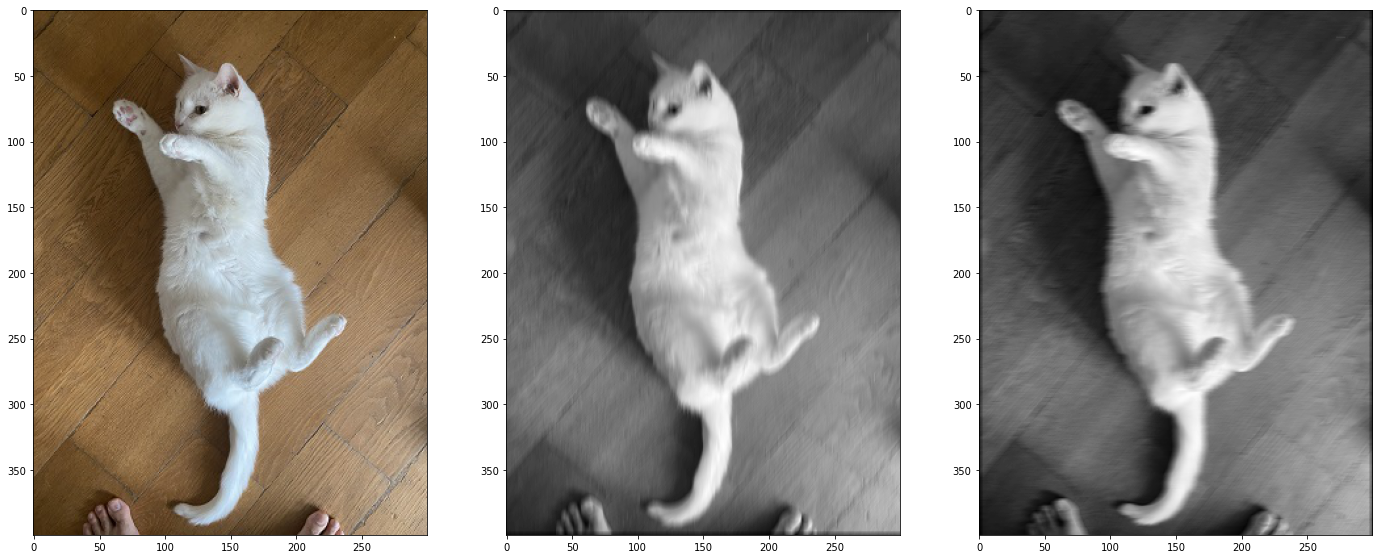

In [3]:
fig = plt.figure(figsize=(24,18))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.imshow(img)
ax2.imshow(out_img[0,:,:,0], cmap='gray')
ax3.imshow(out_img[0,:,:,1], cmap='gray')

### CNN을 이용한 MNIST 분류기

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

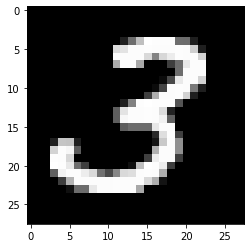

In [10]:
plt.imshow(x_train[i], cmap='gray')

In [11]:
x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [13]:
i = np.random.randint(1000)
print(y_train[i])


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
## data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.25
)
datagen.fit(x_train)

In [ ]:
## create model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(5,5), filters=10, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=20, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics = ['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                25050     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0

In [42]:
#과제: 나만의 모델 만들기

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(5,5),filters=32,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(kernel_size=(5,5),filters=32,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)              

In [43]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'training')
val_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'validation')

history = model.fit_generator( train_generator,
                               epochs = 5,
                               verbose = 1,
                               validation_data = val_generator
                               )


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
704/704 [==============================] - 51s 72ms/step - loss: 1.6956 - accuracy: 0.7074 - val_loss: 0.1407 - val_accuracy: 0.9585
Epoch 2/5
704/704 [==============================] - 50s 71ms/step - loss: 0.1356 - accuracy: 0.9592 - val_loss: 0.0977 - val_accuracy: 0.9717
Epoch 3/5
704/704 [==============================] - 50s 71ms/step - loss: 0.1029 - accuracy: 0.9709 - val_loss: 0.1887 - val_accuracy: 0.9517
Epoch 4/5
704/704 [==============================] - 50s 71ms/step - loss: 0.0915 - accuracy: 0.9745 - val_loss: 0.0927 - val_accuracy: 0.9755
Epoch 5/5
704/704 [==============================] - 50s 71ms/step - loss: 0.0859 - accuracy: 0.9756 - val_loss: 0.0758 - val_accuracy: 0.9789


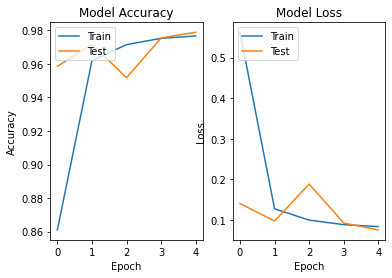

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [45]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'test loss : {loss} / test accuracy : {accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0475 - accuracy: 0.9866
test loss : 0.04753315821290016 / test accuracy : 0.9865999817848206


test value = 5 / pred value = 5


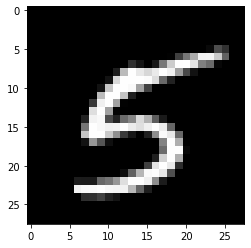

In [48]:
i = np.random.randint(1000)
y_pred = model(np.array([x_test[i]]))
print(f'test value = {np.argmax(y_test[i])} / pred value = {np.argmax(y_pred)}')
im_show = np.reshape(x_test[i], (28,28))
plt.imshow(im_show, cmap='gray')

Overfitting을 방지하기 위한 normalization, drop out, regularization 등 다양한 기법이 있습니다. <br>
더불어 이렇게 만든 모델을 파일 형태로 저장하는 방법도 있으니 나중에 필요할 때 찾아보시면 좋을 거 같네요~
<br><br>
#####  과제!! 
MNIST test data에 대해 accuracy 98% 이상인 모델 만들어보기

### RNN으로 시계열 데이터 예측하기

In [49]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1) ## 각 각 shape = (batch_size, 1)
    time = np.linspace(0, 1, n_steps) ## 0부터 n_steps 만큼 균일하게 나눈 배열 
    series = 0.1 * np.sin((time-offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time-offsets2) * (freq2 * 20 + 20))
    series += 0.05 * (np.random.rand(batch_size, n_steps) - 0.5) # 잡음
    return series[..., np.newaxis].astype(np.float32) # (batch_size, n_steps) -> (batch_size, n_stpes, 1)

x_train shape : (7000, 50, 1)
y_train shape : (7000, 1)


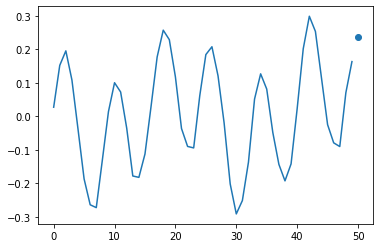

In [50]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

## x 값은 time step = 0~49, y 값은 time step = 50 에서의 값
x_train, y_train = series[:7000, :n_steps], series[:7000, -1] 
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1] 

print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
plt.plot(x_train[0])
plt.scatter([50], y_train[0])

In [51]:
## 마지막 값(time_step = 49)을 그대로 time_step=50으로 예측한다면?

y_pred = x_test[:, -1]
np.mean(tf.keras.losses.mean_squared_error(y_test, y_pred))

0.008293924

In [52]:
## 간단한 FC layer를 사용한다면?

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[50,1]),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='mean_squared_error')

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(x_train, 
          y_train, 
          batch_size = 64,
          epochs = 5,
          steps_per_epoch = len(x_train) // 64,
          validation_data = (x_valid, y_valid))

loss = model.evaluate(x_test, y_test)
print(loss)

Epoch 1/5
109/109 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0029
Epoch 2/5
109/109 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 3/5
109/109 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/5
109/109 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.0011
0.0011037475196644664


In [54]:
## Simple RNN 구조를 사용한다면?

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='mean_squared_error')

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


![image.png](attachment:image.png)

In [55]:
model.fit(x_train, 
          y_train, 
          batch_size = 64,
          epochs = 5,
          steps_per_epoch = len(x_train) // 64,
          validation_data = (x_valid, y_valid))

loss = model.evaluate(x_test, y_test)
print(loss)

Epoch 1/5
109/109 [==============================] - 3s 20ms/step - loss: 0.1454 - val_loss: 0.0072
Epoch 2/5
109/109 [==============================] - 2s 20ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 3/5
109/109 [==============================] - 2s 18ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 4/5
109/109 [==============================] - 2s 18ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0018
0.0017967774765565991


Parameter 개수가 절반이나 되는 RNN 모델이 더 작은 val_loss를 가진다! <br>
RNN의 가장 큰 문제점은 불안정한 그래디언트와 단기 기억이라고 합니다. <br>
지금 올린 부분은 정말 맛보기 정도니까 이를 바탕으로 더 심도있게 공부해보면 좋을 것 같습니다!